# Análise Exploratória de Dados

## Configuração e Leitura
   
Primeiro, importamos as bibliotecas de visualização e carregamos o arquivo que salvamos anteriormente na pasta data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurações de estilo para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Carregamento dos dados
path = os.path.join('..', 'data', 'df_Base_final.csv')
df = pd.read_csv(path)

print(f"Base carregada com {df.shape[0]} registros e {df.shape[1]} colunas.")

Base carregada com 3030 registros e 12 colunas.


Estatística Descritiva

In [4]:
# Resumo estatístico dos indicadores principais
indicadores = ['INDE', 'IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV']
display(df[indicadores].describe().T)

,count,mean,std,min,25%,50%,75%,max
INDE,3030.0,7.274254,0.964235,3.032,6.719198,7.386925,7.946847,9.531325
IAN,3030.0,7.179043,2.535266,2.500,5.000000,5.000000,10.000000,10.000000
IDA,3030.0,6.393042,1.899506,0.000,5.200000,6.666667,7.800000,10.000000
IEG,3030.0,7.962107,2.127571,0.000,7.400000,8.600000,9.397619,10.000000
IAA,3030.0,7.963574,2.560663,0.000,7.900000,8.751000,9.500000,10.002000
IPS,3030.0,6.355578,1.763518,2.500,5.600000,7.500000,7.510000,10.000000
IPP,3030.0,7.190729,1.127373,-0.074,6.406250,7.500000,7.968750,10.000000
IPV,3030.0,7.547680,1.052041,2.500,7.012500,7.583000,8.222000,10.010000


Visualização de Distribuições

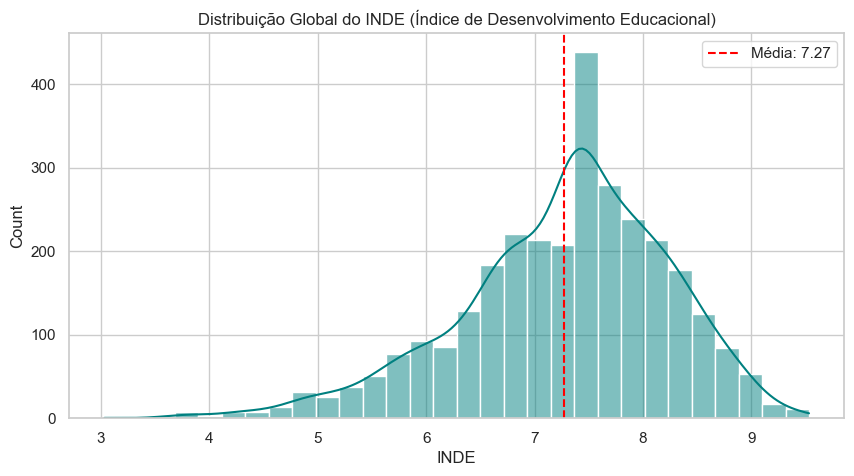

In [5]:
# Distribuição do INDE
plt.figure(figsize=(10, 5))
sns.histplot(df['INDE'], kde=True, color='teal', bins=30)
plt.title('Distribuição Global do INDE (Índice de Desenvolvimento Educacional)')
plt.axvline(df['INDE'].mean(), color='red', linestyle='--', label=f"Média: {df['INDE'].mean():.2f}")
plt.legend()
plt.show()

A maioria apresenta desempenho educacional razoavelmente bom (≥6), mas há um grupo menor com INDE baixo que merece atenção focalizada.

Estratégia recomendada: programas direcionados (diagnóstico + intervenções) para as localidades na cauda esquerda (por exemplo, INDE < 6), enquanto políticas de manutenção/aperfeiçoamento para o núcleo médio-alto.

Avaliar se os valores extremos baixos correspondem a problemas estruturais (recursos, infraestrutura, formação de professores) e priorizar esses locais.

Indice de Correlação

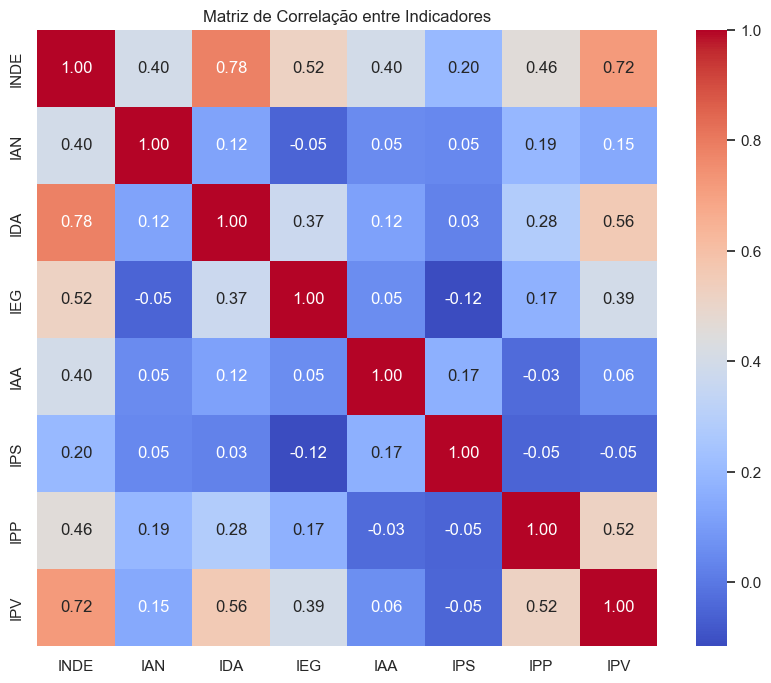

In [6]:
# Mapa de calor de correlação
plt.figure(figsize=(10, 8))
corr = df[indicadores].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Indicadores')
plt.show()

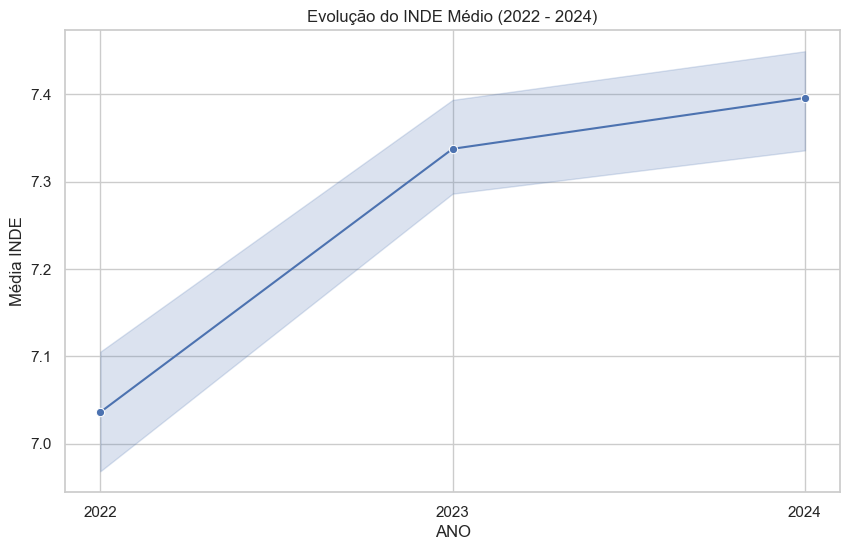

In [7]:
# Evolução da média do INDE por Ano
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='ANO', y='INDE', marker='o', estimator='mean', errorbar=('ci', 95))
plt.title('Evolução do INDE Médio (2022 - 2024)')
plt.xticks([22, 23, 24], ['2022', '2023', '2024'])
plt.ylabel('Média INDE')
plt.show()

C:\Users\mtmal\AppData\Local\Temp\ipykernel_596\460185650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FASE', y='INDE', palette='Set3')


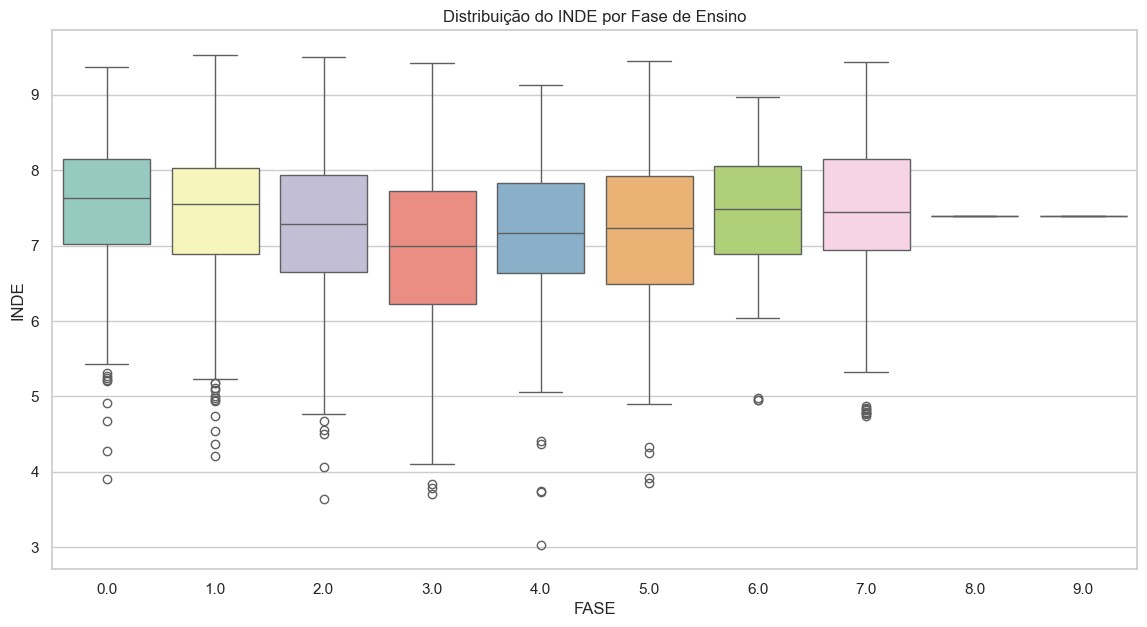

In [8]:
# Boxplot do INDE por FASE
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='FASE', y='INDE', palette='Set3')
plt.title('Distribuição do INDE por Fase de Ensino')
plt.show()